In [33]:
library(dplyr)
library(ggplot2)

In [1]:
ufo<-read.delim("ufo_awesome.tsv", sep="\t", stringsAsFactors=FALSE,header=FALSE, na.strings="")

In [5]:
ufo

,V1,V2,V3,V4,V5,V6
1,19951009,19951009,"Iowa City, IA",NA,NA,"Man repts. witnessing &quot;flash, followed by a classic UFO, w/ a tailfin at back.&quot; Red color on top half of tailfin. Became triangular."
2,19951010,19951011,"Milwaukee, WI",NA,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bright blue light streak by his car, descend, turn, cross road ahead, strobe. Bizarre!"
3,19950101,19950103,"Shelton, WA",NA,NA,"Telephoned Report:CA woman visiting daughter witness discs and triangular ships over Squaxin Island in Puget Sound. Dramatic. Written report, with illustrations, submitted to NUFORC."
4,19950510,19950510,"Columbia, MO",NA,2 min.,"Man repts. son&apos;s bizarre sighting of small humanoid creature in back yard. Reptd. in Acteon Journal, St. Louis UFO newsletter."
5,19950611,19950614,"Seattle, WA",NA,NA,"Anonymous caller repts. sighting 4 ufo&apos;s in NNE sky, 45 deg. above horizon. (No other facts reptd. No return tel. #.)"
6,19951025,19951024,"Brunswick County, ND",NA,30 min.,"Sheriff&apos;s office calls to rept. that deputy, 20 mi. SSE of Wilmington, is looking at peculiar, bright white, strobing light."
7,19950420,19950419,"Fargo, ND",NA,2 min.,"Female student w/ friend witness huge red light in sky. 2 others witness. Obj pulsated, started to flicker. Winked out."
8,19950911,19950911,"Las Vegas, NV",NA,NA,"Man repts. bright, multi-colored obj. in NW night sky. Disappeared while he was in house."
9,19950115,19950214,"Morton, WA",NA,NA,Woman reports 2 craft fly over house. Strange events taking place in town w/ paramilitary activities.
10,19950915,19950915,"Redmond, WA",NA,6 min.,"Young man w/ 2 co-workers witness tiny, distinctly white round disc drifting slowly toward NE. Flew in dir. 90 deg. to winds."


In [2]:
names(ufo)<-c("DateOccurred","DateReported","Location","ShortDescription","Duration","LongDescription")
head(ufo[which(nchar(ufo$DateOccurred)!=8 | nchar(ufo$DateReported)!=8),1])


[1] "ler@gnv.ifas.ufl.edu"                                                                                                                                                     
[2] "0000"                                                                                                                                                                     
[3] "Callers report sighting a number of soft white  balls of lights headingin an easterly directing then changing direction to the west beforespeeding off to the north west."
[4] "0000"                                                                                                                                                                     
[5] "0000"                                                                                                                                                                     
[6] "0000"

In [3]:
good.rows<-ifelse(nchar(ufo$DateOccurred)!=8 | nchar(ufo$DateReported)!=8,FALSE,TRUE)
length(which(!good.rows))

[1] 688

In [41]:
ufo$DateOccurred<-as.Date(ufo$DateOccurred, format="%Y%m%d")
ufo$DateReported<-as.Date(ufo$DateReported, format="%Y%m%d")

In [42]:
get.location<-function(l) {
  split.location<-tryCatch(strsplit(l,",")[[1]], error= function(e) return(c(NA, NA)))
  clean.location<-gsub("^ ","",split.location)
  if (length(clean.location)>2) {
    return(c(NA,NA))
  }else {
    return(clean.location)
  }
}

In [43]:
city.state<-lapply(ufo$Location, get.location)
head(city.state)

[[1]]
[1] "Iowa City" "IA"       

[[2]]
[1] "Milwaukee" "WI"       

[[3]]
[1] "Shelton" "WA"     

[[4]]
[1] "Columbia" "MO"      

[[5]]
[1] "Seattle" "WA"     

[[6]]
[1] "Brunswick County" "ND"

In [44]:
location.matrix<-do.call(rbind, city.state)
ufo<-transform(ufo, USCity=location.matrix[,1], USState=tolower(location.matrix[,2]),stringsAsFactors=FALSE)


In [45]:
us.states<-c("ak","al","ar","az","ca","co","ct","de","fl","ga","hi","ia","id","il",
"in","ks","ky","la","ma","md","me","mi","mn","mo","ms","mt","nc","nd","ne","nh",
"nj","nm","nv","ny","oh","ok","or","pa","ri","sc","sd","tn","tx","ut","va","vt",
"wa","wi","wv","wy")

In [46]:
ufo$USState<-us.states[match(ufo$USState,us.states)]
ufo$USCity[is.na(ufo$USState)]<-NA
ufo.us<-subset(ufo,!is.na(USState))

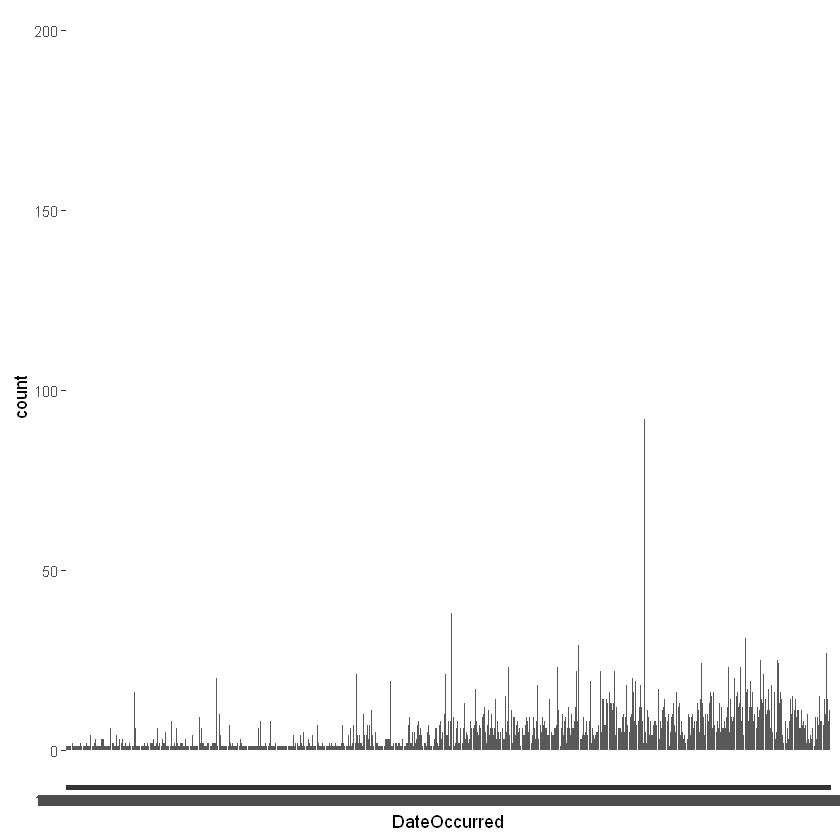

In [33]:
ggplot(ufo.us, aes(x=DateOccurred))+stat_count()


In [48]:
summary(ufo.us$DateOccurred)

        Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"1990-01-01" "2001-02-11" "2004-09-16" "2004-03-06" "2007-11-06" "2010-08-30" 

In [28]:
head(ufo$DateOccurred[1])

[1] "1995-10-09"

In [47]:
ufo.us<-subset(ufo.us,DateOccurred>=as.Date("1990-01-01"))
nrow(ufo.us)

[1] 46347

In [49]:
ufo.us$YearMonth<-strftime(ufo.us$DateOccurred, format="%Y-%m")

In [60]:
sightings.counts = ufo.us %>% 
  group_by(USState, YearMonth) %>% 
  summarise(n = n())


In [51]:
date.range<-seq.Date(from=as.Date(min(ufo.us$DateOccurred)),to=as.Date(max(ufo.us$DateOccurred)), by="month")
date.strings<-strftime(date.range, "%Y-%m")

In [52]:
states.dates<-lapply(us.states,function(s) cbind(s,date.strings))


In [53]:
states.dates

s,date.strings
ak,1990-01
ak,1990-02
ak,1990-03
ak,1990-04
ak,1990-05
ak,1990-06
ak,1990-07
ak,1990-08
ak,1990-09
ak,1990-10


In [54]:
states.dates<-data.frame(do.call(rbind, states.dates), stringsAsFactors=FALSE)


In [55]:
states.dates

,s,date.strings
1,ak,1990-01
2,ak,1990-02
3,ak,1990-03
4,ak,1990-04
5,ak,1990-05
6,ak,1990-06
7,ak,1990-07
8,ak,1990-08
9,ak,1990-09
10,ak,1990-10


In [62]:
all.sightings<-merge(states.dates,sightings.counts,by.x=c("s","date.strings"),by.y=c("USState","YearMonth"),all=TRUE)


In [63]:
head(all.sightings)

,s,date.strings,n
1,ak,1990-01,1
2,ak,1990-02,NA
3,ak,1990-03,1
4,ak,1990-04,NA
5,ak,1990-05,1
6,ak,1990-06,NA


In [64]:
names(all.sightings)<-c("State","YearMonth","Sightings")
all.sightings$Sightings[is.na(all.sightings$Sightings)]<-0
all.sightings$YearMonth<-as.Date(rep(date.range,length(us.states)))
all.sightings$State<-as.factor(toupper(all.sightings$State))

In [70]:
state.plot<-ggplot(all.sightings, aes(x=YearMonth,y=Sightings))+
geom_line(aes(color="darkblue"))+
facet_wrap(~State,nrow=10,ncol=5)